In [1]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mpdates
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import random
import gc

In [3]:
dfm=pd.read_csv('BTC_USDT-15m.csv')
dfm

,unix,open,high,low,close,volume,date
0,1577836800000,7196.2,7196.2,7182.6,7183.9,2.907673,2020-01-01 03:30:00
1,1577837700000,7184.0,7187.5,7179.1,7181.4,3.223014,2020-01-01 03:45:00
2,1577838600000,7181.4,7185.9,7180.7,7182.6,2.354443,2020-01-01 04:00:00
3,1577839500000,7182.5,7183.3,7176.1,7180.4,2.866514,2020-01-01 04:15:00
4,1577840400000,7180.5,7192.1,7179.9,7191.1,4.012319,2020-01-01 04:30:00
...,...,...,...,...,...,...,...
121796,1687453200000,29973.3,29979.8,29893.1,29956.9,43.441762,2023-06-22 20:30:00
121797,1687454100000,29957.0,30037.0,29949.1,30014.1,56.846026,2023-06-22 20:45:00
121798,1687455000000,30014.0,30140.0,29985.8,30124.2,73.419562,2023-06-22 21:00:00
121799,1687455900000,30123.4,30183.9,30104.8,30146.0,49.186146,2023-06-22 21:15:00


In [22]:
df=dfm[150:200]
df

,unix,open,high,low,close,volume,date
150,1577971800000,7145.8,7146.5,7112.7,7124.0,13.620904,2020-01-02 17:00:00
151,1577972700000,7124.0,7140.4,7108.9,7131.4,10.032687,2020-01-02 17:15:00
152,1577973600000,7131.2,7141.9,7126.4,7128.0,5.699145,2020-01-02 17:30:00
153,1577974500000,7128.0,7136.2,7125.5,7132.2,10.696940,2020-01-02 17:45:00
154,1577975400000,7132.3,7152.1,7132.3,7152.1,6.727511,2020-01-02 18:00:00
155,1577976300000,7151.9,7157.4,7135.7,7135.7,4.893832,2020-01-02 18:15:00
156,1577977200000,7135.8,7149.4,7135.7,7140.3,8.679134,2020-01-02 18:30:00
157,1577978100000,7140.4,7143.5,7127.0,7128.6,5.516067,2020-01-02 18:45:00
158,1577979000000,7128.6,7132.5,7120.3,7130.3,9.419738,2020-01-02 19:00:00
159,1577979900000,7130.4,7132.8,7126.4,7131.6,5.932274,2020-01-02 19:15:00


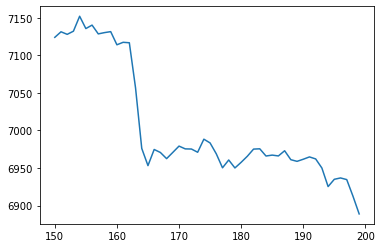

In [9]:
plt.plot(df['close'])

In [24]:
def plot_chart(stock_prices):
    stock_prices=stock_prices.reset_index()
    h=stock_prices['high']
    l=stock_prices['low']
    c=stock_prices['close']


    
    plt.figure(figsize=(30,16))
    plt.title(str('Chart'))
    plt.xticks(stock_prices.index, stock_prices['date'],rotation=90)
    plt.xlim(0,len(h))
    plt.ylim(l.min()*0.999, h.max()*1.001)


    #============================================================  candles
    up = stock_prices[stock_prices.close >= stock_prices.open]
    down = stock_prices[stock_prices.close < stock_prices.open]
    col1 = 'green'
    colupsaye='cyan'

    col2 = 'red'
    coldownsaye='yellow'

    # Setting width of candlestick elements
    width = .3
    width2 = .3

    # Plotting up prices of the stock
    plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)

    plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=colupsaye)
    plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=colupsaye)

    # Plotting down prices of the stock
    plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)

    plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=coldownsaye)
    plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=coldownsaye)


#     sttime=get_string_time()
#     plt.savefig(filename,facecolor='white', transparent=False,dpi=100,bbox_inches='tight')
#     plt.grid()
#     plt.legend()

    plt.show()
    print('done')
    

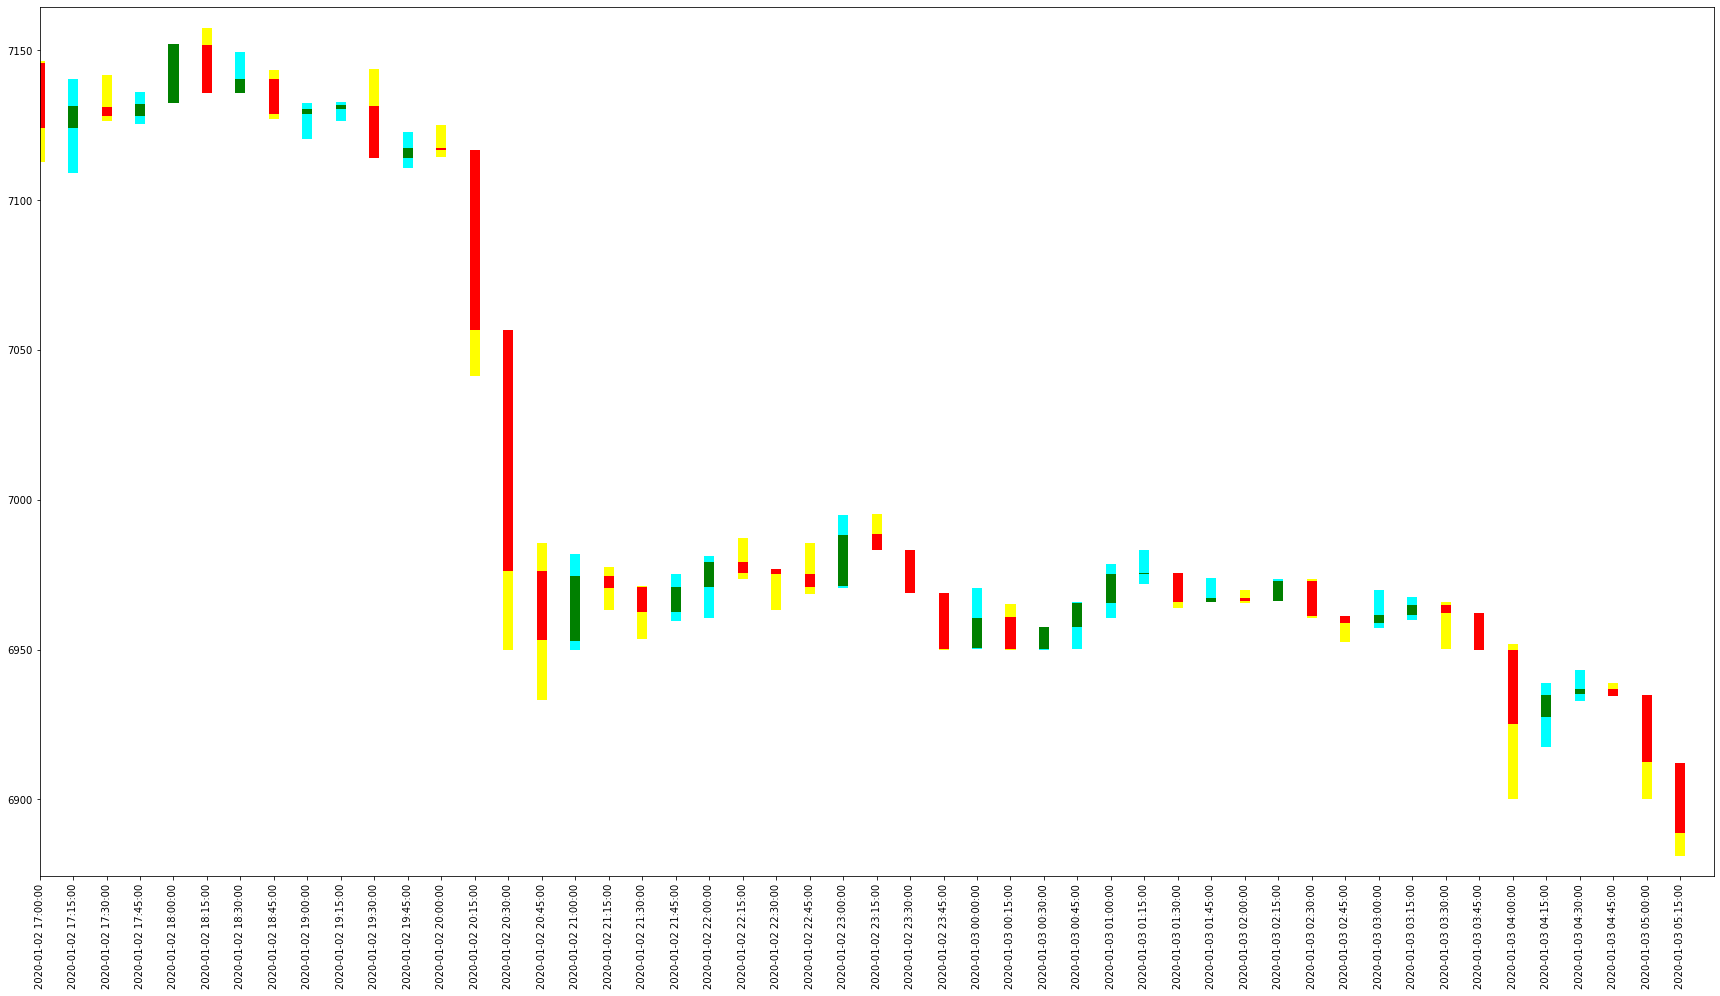

done


In [25]:
plot_chart(df)